# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [56]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birds = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [30]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birds.groupby(birds.bird_name)  # groupby() doesn't return an output!!

In [31]:
# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()
mean_speeds  # voila

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [32]:
# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [33]:
import datetime

In [34]:
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [35]:
birds["DATE"] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in [date[:-3] for date in birds.date_time]]

In [36]:
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,DATE
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [37]:
type(birds.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
# Convert birddata.date_time to the `pd.datetime` format.
pd.to_datetime([date[:-3] for date in birds.date_time], format="%Y-%m-%d %H:%M:%S");
birds["date"] = pd.to_datetime([date[:-3] for date in birds.date_time], format="%Y-%m-%d %H:%M:%S")

In [40]:
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,DATE,date
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42,2013-08-15 02:17:42


In [44]:
type(birds.date[0]) == type(birds.DATE[0])  # voila

True

In [46]:
np.all(birds.date == birds.DATE)  # voila

True

## **Corrections**

In [54]:
datetime.datetime.strptime("2013-08-15 00:01:08"[:-9], "%Y-%m-%d")  # welp!

datetime.datetime(2013, 8, 15, 0, 0)

In [60]:
# Create a new column of day of observation
# birds.drop(["DATE","date"], axis=1)
birds["date"] = [datetime.datetime.strptime(day, "%Y-%m-%d") for day in [date[:-12] for date in birds.date_time]]

In [61]:
birds.head()  # voila

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [62]:
# Use `groupby()` to group the data by date.
grouped_bydates = birds.groupby(birds.date)

In [65]:
# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

In [79]:
np.where(pd.DataFrame(mean_altitudes_perday).index == "2013-09-12")

(array([28], dtype=int64),)

In [80]:
mean_altitudes_perday[28]  # voilaaaaaa

75.64609053497942

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [81]:
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [83]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birds.groupby([birds.bird_name, birds.date])

In [85]:
# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

In [109]:
pd.DataFrame(mean_altitudes_perday)

altitude
bird_name date                  
Eric      2013-08-15   74.988095
          2013-08-16  127.773810
          2013-08-17  125.890244
          2013-08-18  121.353659
          2013-08-19  134.928571
...                          ...
Sanne     2014-04-26   17.116667
          2014-04-27   17.391892
          2014-04-28   58.876712
          2014-04-29   30.530120
          2014-04-30    4.361111

[770 rows x 1 columns]

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

In [111]:
birds.groupby([birds.bird_name, birds.date]).speed_2d.mean()

bird_name  date      
Eric       2013-08-15    2.121517
           2013-08-16    2.618113
           2013-08-17    1.765809
           2013-08-18    2.951171
           2013-08-19    2.435545
                           ...   
Sanne      2014-04-26    1.056218
           2014-04-27    2.439322
           2014-04-28    3.344398
           2014-04-29    2.220966
           2014-04-30    1.814705
Name: speed_2d, Length: 770, dtype: float64

In [112]:
pd.DataFrame(birds.groupby([birds.bird_name, birds.date]).speed_2d.mean())
# convert the result to a pandas dataframe

speed_2d
bird_name date                
Eric      2013-08-15  2.121517
          2013-08-16  2.618113
          2013-08-17  1.765809
          2013-08-18  2.951171
          2013-08-19  2.435545
...                        ...
Sanne     2014-04-26  1.056218
          2014-04-27  2.439322
          2014-04-28  3.344398
          2014-04-29  2.220966
          2014-04-30  1.814705

[770 rows x 1 columns]

In [114]:
data = pd.DataFrame(birds.groupby([birds.bird_name, birds.date]).speed_2d.mean()).reset_index()
data
# convert the indices to normal columns

,bird_name,date,speed_2d
0,Eric,2013-08-15,2.121517
1,Eric,2013-08-16,2.618113
2,Eric,2013-08-17,1.765809
3,Eric,2013-08-18,2.951171
4,Eric,2013-08-19,2.435545
...,...,...,...
765,Sanne,2014-04-26,1.056218
766,Sanne,2014-04-27,2.439322
767,Sanne,2014-04-28,3.344398
768,Sanne,2014-04-29,2.220966


In [ ]:
data[data.bird_name=="Eric"].speed_2d

0      2.121517
1      2.618113
2      1.765809
3      2.951171
4      2.435545
         ...   
247    2.262308
248    2.667432
249    2.159156
250    2.371772
251    2.548936
Name: speed_2d, Length: 252, dtype: float64

In [125]:
data[data.bird_name=="Nico"][data.date=="2014-04-04"]

C:\Users\Anoba\AppData\Local\Temp/ipykernel_10420/3576675074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.bird_name=="Nico"][data.date=="2014-04-04"]


,bird_name,date,speed_2d
484,Nico,2014-04-04,2.832465


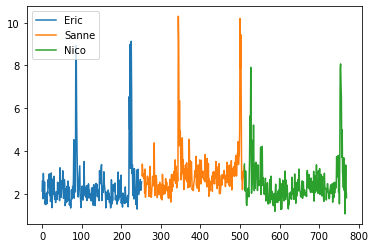

In [118]:
import matplotlib.pyplot as plt

eric_daily_speed  = pd.Series(data[data.bird_name=="Eric"].speed_2d)
sanne_daily_speed = pd.Series(data[data.bird_name=="Nico"].speed_2d)
nico_daily_speed  = pd.Series(data[data.bird_name=="Sanne"].speed_2d)
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

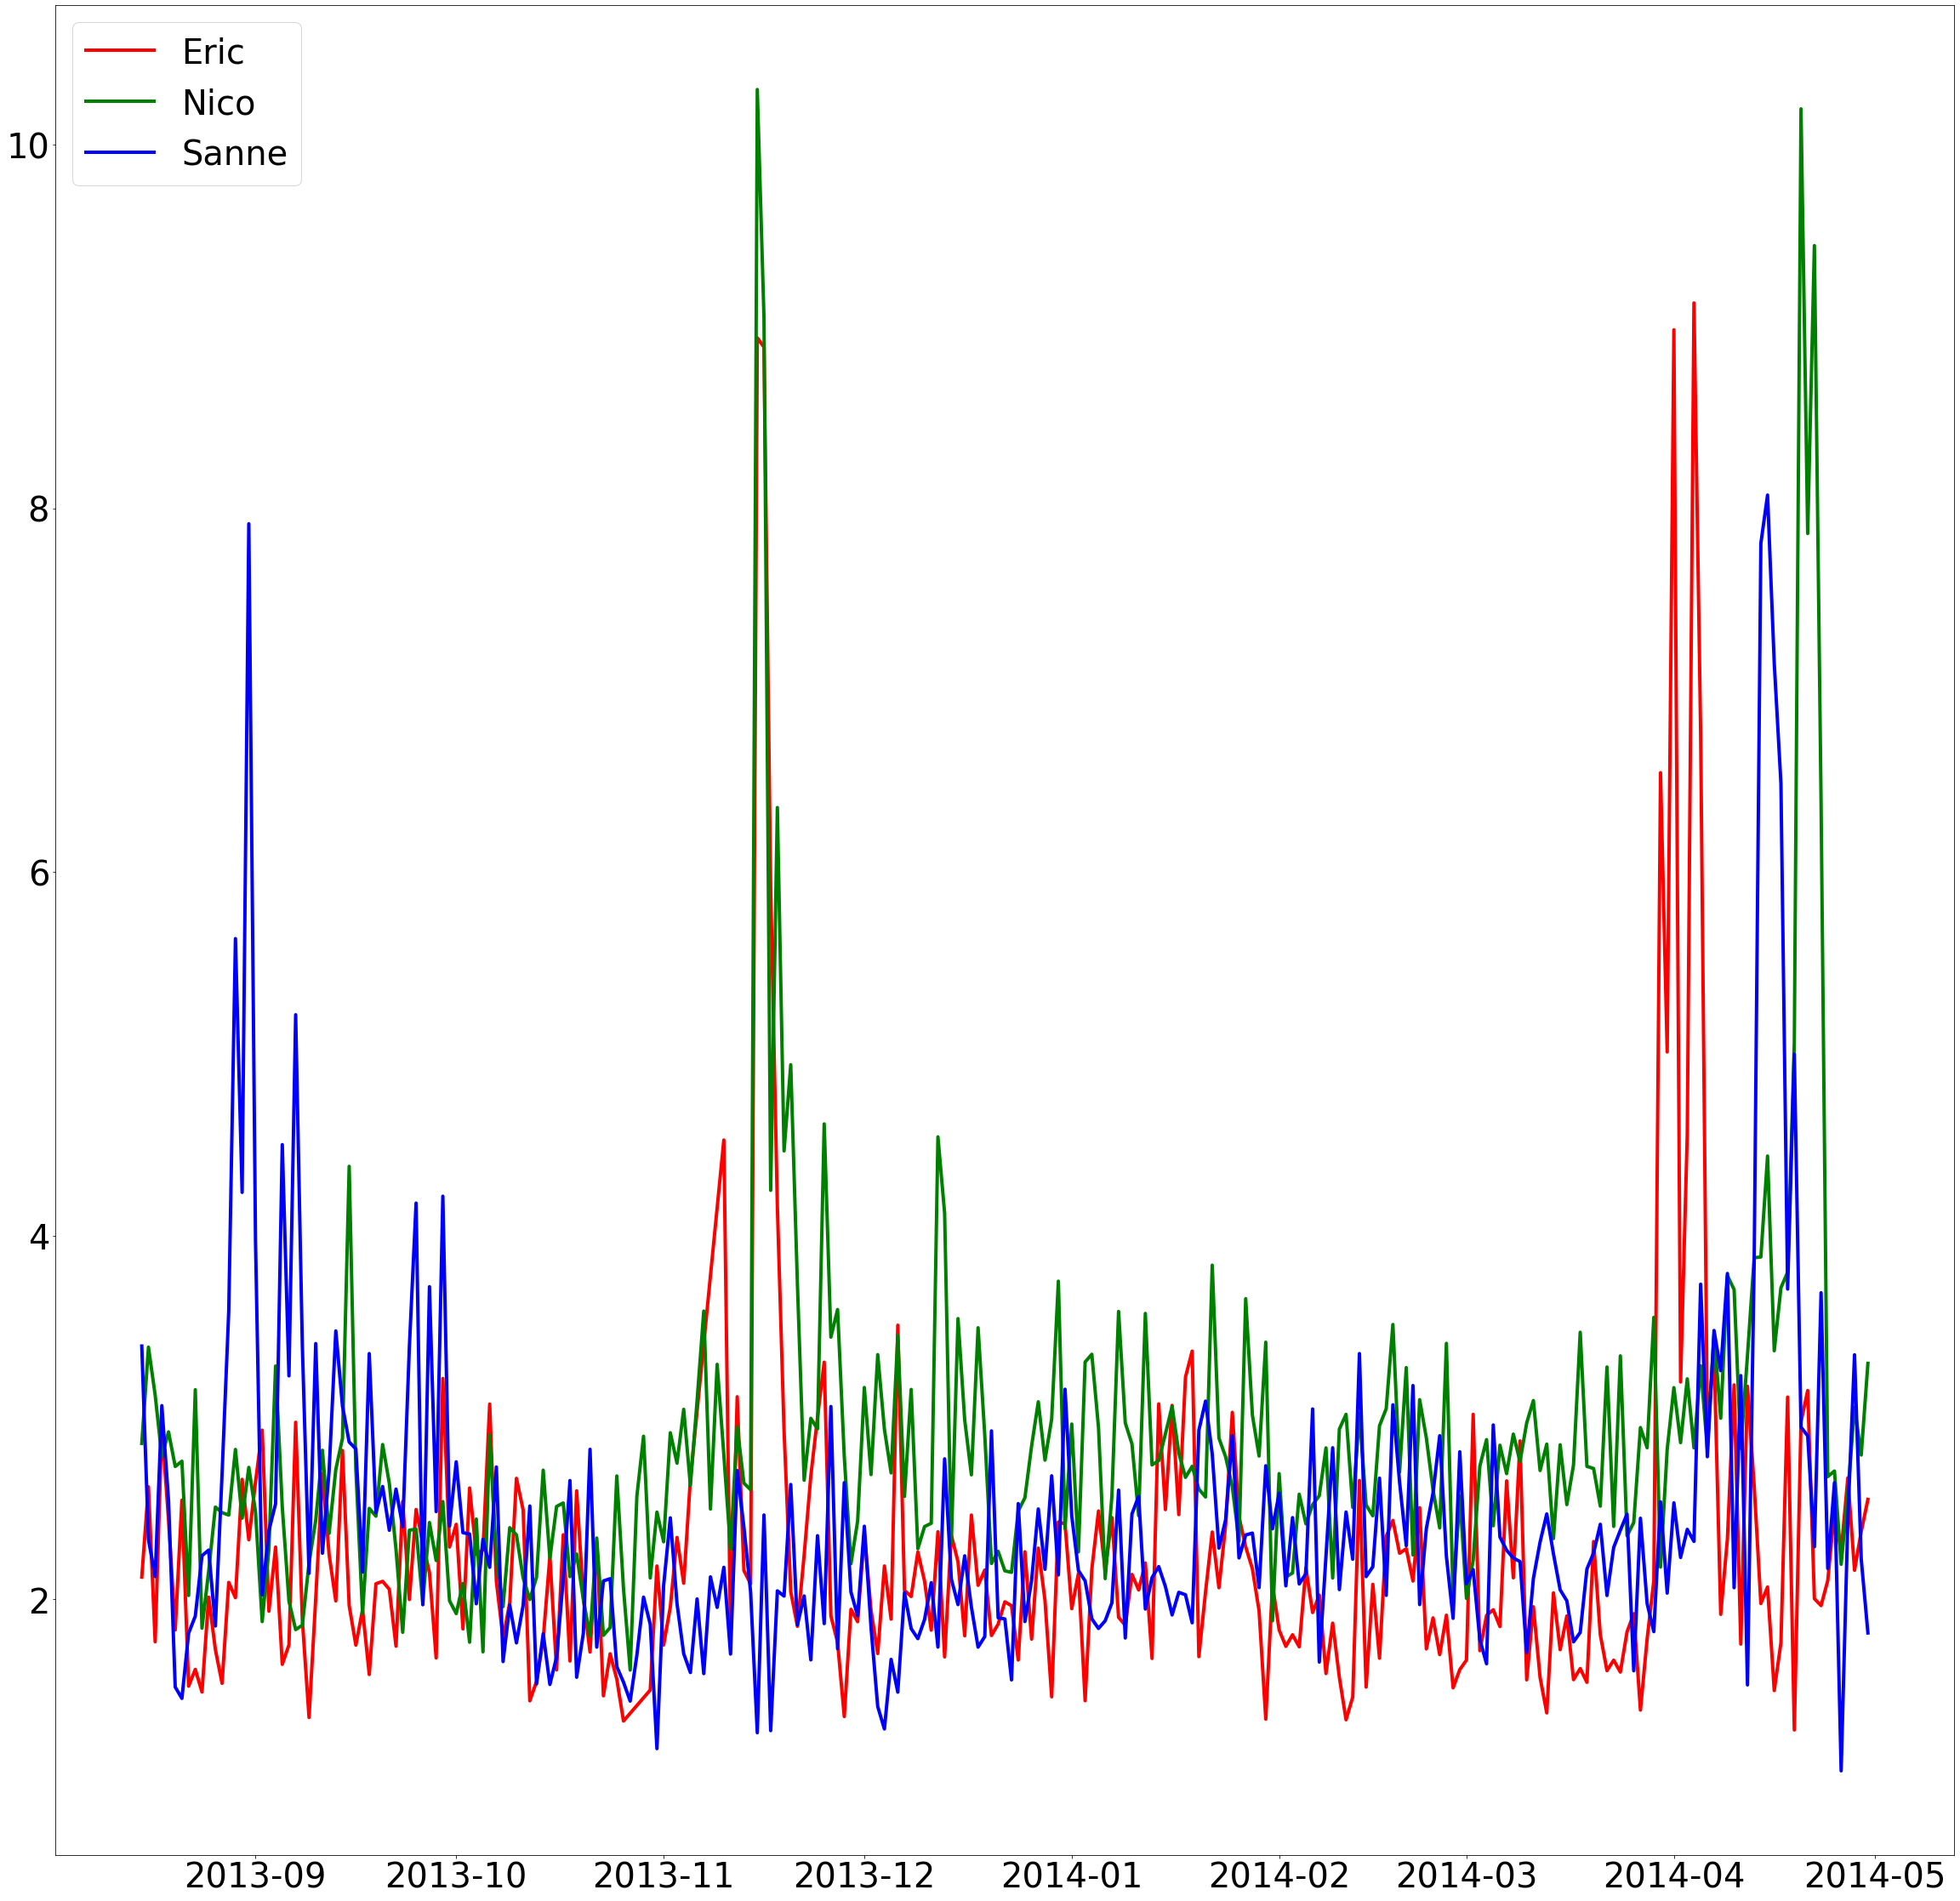

In [121]:
eric = data[data.bird_name=="Eric"]
nico = data[data.bird_name=="Nico"]
sanne = data[data.bird_name=="Sanne"]

plt.figure(figsize=(40,40))
plt.rcParams["font.size"]=40
plt.plot(eric.date, eric.speed_2d, color="red", linestyle="-", linewidth=4, label="Eric")
plt.plot(nico.date, nico.speed_2d, color="green", linestyle="-", linewidth=4, label="Nico")
plt.plot(sanne.date, sanne.speed_2d, color="blue", linestyle="-", linewidth=4, label="Sanne")
plt.legend(loc="best")
plt.show()